In [1]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('data/train_processed.csv')
test = pd.read_csv('data/test_processed.csv')
sample = pd.read_csv('data/gender_submission.csv')
test_sample = pd.read_csv('data/test.csv')

In [3]:
train.columns

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Age_bin', 'Fare_bin',
       'Relations', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [4]:
X = train[['Pclass', 'Fare_bin', 'Age_bin', 'SibSp', 'Parch', 'Relations', 'Sex_male', 'Embarked_Q', 'Embarked_Q']]

In [5]:
y = train[['Survived']].values.ravel()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [8]:
#performing predictions on the test dataset
y_pred = model_rf.predict(X_test)
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7932960893854749


In [9]:
train['Predicted'] = model_rf.predict(X)

In [10]:
False_Positives = train.loc[(train['Survived'] == 0) & (train['Predicted'] == 1)]
False_Negatives = train.loc[(train['Survived'] == 1) & (train['Predicted'] == 0)]

In [11]:
False_Positives.shape

(27, 11)

In [12]:
False_Negatives.shape

(60, 11)

In [13]:
False_Negatives

,Survived,Pclass,SibSp,Parch,Age_bin,Fare_bin,Relations,Sex_male,Embarked_Q,Embarked_S,Predicted
17,1,2,0,0,11,3,0,1,0,1,0
19,1,3,0,0,11,1,0,0,0,0,0
21,1,2,0,0,13,3,0,1,0,1,0
23,1,1,0,0,11,8,0,1,0,1,0
36,1,3,0,0,11,1,0,1,0,0,0
39,1,3,1,0,5,2,3,0,0,0,0
55,1,1,0,0,11,8,0,1,0,1,0
68,1,3,4,2,6,1,4,0,0,1,0
81,1,3,0,0,11,2,0,1,0,1,0
107,1,3,0,0,11,1,0,1,0,1,0


## Analysing False Negatives

<AxesSubplot: xlabel='Sex_male', ylabel='Count'>

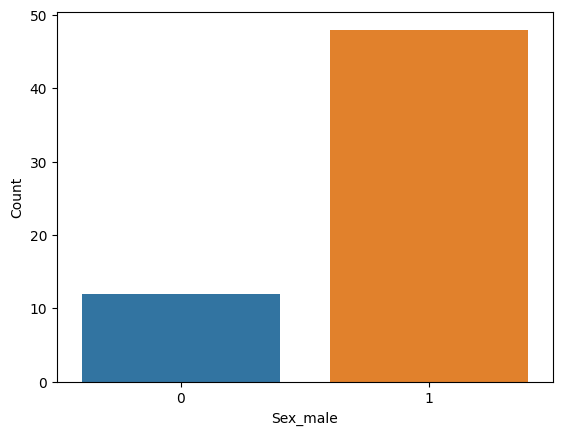

In [14]:
sns.barplot(data = False_Negatives.groupby(['Sex_male']).size().reset_index(name = 'Count'), x = 'Sex_male', y= 'Count')

<AxesSubplot: xlabel='Sex_male', ylabel='Count'>

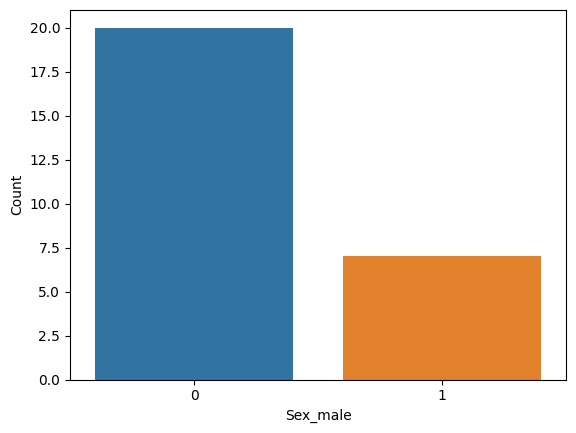

In [15]:
sns.barplot(data = False_Positives.groupby(['Sex_male']).size().reset_index(name = 'Count'), x = 'Sex_male', y= 'Count')

- too biased towards the gender

<AxesSubplot: xlabel='Pclass', ylabel='Count'>

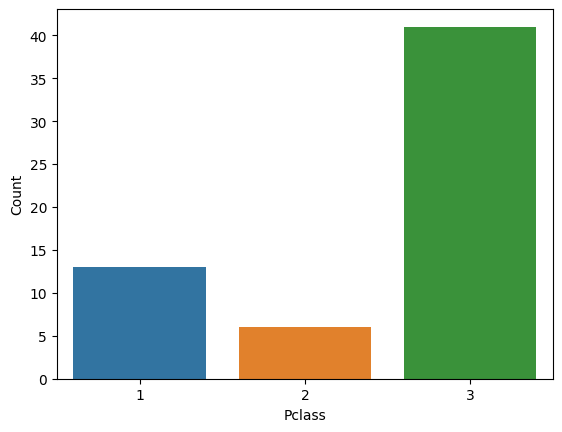

In [16]:
sns.barplot(data = False_Negatives.groupby(['Pclass']).size().reset_index(name = 'Count'), x = 'Pclass', y= 'Count')

- The model is underfitting.

In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7932960893854749


In [18]:
X_sub = test[['Pclass', 'Fare_bin', 'Age_bin', 'SibSp', 'Parch', 'Relations', 'Sex_male', 'Embarked_Q', 'Embarked_Q']]

In [19]:
Y_sub = model_rf.predict(X_sub)

In [20]:
test_sample.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [21]:
test_sample['Survived'] = Y_sub
test_sample[['PassengerId','Survived']].to_csv('submission.csv', index = False)

In [22]:
#check for false positives